# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yasbhatti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

# print type, to make sure it contains api key
print(type(api_key))

<class 'str'>


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 7581


In [5]:
# display sample bitcoin article contents
bitcoin_headlines['articles'][9]['content']

'Twitter will now allow people to tip their favorite content creators with bitcoin and will also launch a fund to pay some users who host audio chat rooms on its Spaces feature, the company said on Th… [+2802 chars]'

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 2625


In [7]:
# display sample ethereum article contents
ethereum_headlines['articles'][22]['content']

'Representations of cryptocurrencies Bitcoin and Ethereum are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/IllustrationSINGAPORE, Sept 27 (Reuters) - Cryptocu… [+592 chars]'

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# Assign bitcoin_sentiments variable to store the data
bitcoin_sentiments = []

# create a for loop to fetch all the articles from bitcoin headlines
for article in bitcoin_headlines["articles"]:
    # Add exception to ignore AttributeError using try, except, pass
    try:
        # extract date from news-api articles (first 10 characters)
        date = article["publishedAt"][:10]
        # extract text from news-api articles
        text = article["content"]
        # use vader sentimentIntensityAnalyzer to get polarity_scores
        sentiment = analyzer.polarity_scores(text)
        # assign variables to store sentiments
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        # append all the data as list in above assigned bitcoin_sentiments variable   
        bitcoin_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
                     
    except AttributeError:
        pass
            
# create bitcoin dataframe using above sentiments            
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884


In [9]:
# Create the Ethereum sentiment scores DataFrame
# Assign ethereum_sentiments variable to store the data
ethereum_sentiments = []

# create a for loop to fetch all the articles from ethereum headlines
for article in ethereum_headlines["articles"]:
    # Add exception to ignore AttributeError using try, except, pass
    try:
         # extract date from news-api articles (first 10 characters)
        date = article["publishedAt"][:10]
        # extract text from news-api articles
        text = article["content"]
        # use vader sentimentIntensityAnalyzer to get polarity_scores
        sentiment = analyzer.polarity_scores(text)
        # assign variables to store sentiments
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        # append all the data in above assigned etherum_sentiments variable 
        ethereum_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# create dataframe using above ethereum sentiments
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.0,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.0,0.892
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.0,0.899


In [10]:
# Describe (summary) the Bitcoin Sentiments
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.124151,0.04596,0.016300,0.937740
std,0.308436,0.06020,0.043855,0.072924
min,-0.790600,0.00000,0.000000,0.659000
25%,0.000000,0.00000,0.000000,0.896500
50%,0.000000,0.00000,0.000000,0.951000
75%,0.361200,0.07975,0.000000,1.000000
max,0.855500,0.24000,0.280000,1.000000


In [11]:
# Describe the Ethereum Sentiments
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.138240,0.059560,0.026810,0.913640
std,0.352547,0.067932,0.047023,0.082301
min,-0.757900,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.855250
50%,0.000000,0.058500,0.000000,0.926000
75%,0.426225,0.102000,0.044250,1.000000
max,0.876500,0.286000,0.210000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score 0.059560. 

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score 0.876500. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score 0.286000. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
# import necessary libraries and their dependencies
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# import nltk to access stopwords 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yasbhatti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yasbhatti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yasbhatti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list
sw_addons = {'chew', 'char','itthe', 'th', 'said', 'sent', 'found', 'including', 'today', 'charslast',
             'could', 'url', 'www', 'com', 'ul', 'li','Getty', 'getty', 'http', 'll', 'charsa', 'charthe',
             'httpsiftttiyinr', 'httpsifttteavjhow', 'httpsiftttbkdpx', 'httpsifttteavjhow', 
             'httpsifttteavjelon', 'httpsiftttafho', 'httpsifttteavjdigital', 'httpsifttteavjjpmorgan',
             'announced', 'week', 'basically', 'also', 'ha', 'jrr', 'meme', 'the', 'kellythe'}

In [15]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    # Remove the punctuation and other non-letter characters
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase,  Remove the stop words and the add-ons stopwords
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]  
    return tokens

In [16]:
# create token column in bitcoin_df using tokenizer function on 'text' column 
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
# re-arrange bitcoin_df columns to desired order
cols = ['date', 'text', 'tokens', 'compound', 'positive', 'negative', 'neutral']
bitcoin_df = bitcoin_df[cols]
bitcoin_df

,date,text,tokens,compound,positive,negative,neutral
0,2021-09-23,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, inap...",0.0000,0.000,0.000,1.000
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,"[bitcoin, similar, blockchainbased, cryptos, e...",0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...","[ullibitcoin, term, market, value, rose, lilii...",0.3400,0.076,0.000,0.924
3,2021-10-06,How high are the chances of Bitcoin sustaining...,"[high, chance, bitcoin, sustaining, gain, push...",0.4939,0.219,0.000,0.781
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ...",-0.2411,0.000,0.116,0.884
...,...,...,...,...,...,...,...
95,2021-10-21,* World stocks dip as risk aversion returns\r\...,"[world, stock, dip, risk, aversion, return, tu...",-0.7906,0.061,0.280,0.659
96,2021-10-15,"By Reuters Staff\r\nJack Dorsey, co-founder of...","[reuters, staffjack, dorsey, cofounder, twitte...",0.0000,0.000,0.000,1.000
97,2021-10-21,"LONDON, Oct 21 (Reuters) - World stocks slippe...","[london, oct, reuters, world, stock, slipped, ...",-0.2023,0.000,0.049,0.951
98,2021-09-24,"NEW YORK, Sept 24 (Reuters) - Chinas moves to ...","[new, york, sept, reuters, chinas, move, crack...",0.2023,0.049,0.000,0.951


In [17]:
# create token column in ethereum_df using tokenizer function on 'text' column 
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
# re-arrange ethereum_df columns to desired order
cols = ['date', 'text', 'tokens', 'compound', 'positive', 'negative', 'neutral']
ethereum_df = ethereum_df[cols]
ethereum_df 

,date,text,tokens,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,"[new, crosschain, bridge, currently, connected...",0.0000,0.000,0.000,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currenci...",0.0000,0.000,0.000,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,"[mark, cuban, advice, people, new, investing, ...",0.0000,0.000,0.000,1.000
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,"[robinhood, plan, start, cryptocurrency, walle...",0.4588,0.108,0.000,0.892
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...","[image, source, foundationappsideeyeingchloeim...",0.4215,0.101,0.000,0.899
...,...,...,...,...,...,...,...
95,2021-10-09,"Cryptocurrencies are risky, speculative invest...","[cryptocurrencies, risky, speculative, investm...",0.4404,0.131,0.043,0.826
96,2021-10-05,Cryptocurrency has taken the investing world b...,"[cryptocurrency, taken, investing, world, stor...",0.0000,0.000,0.000,1.000
97,2021-10-21,What happened \r\nCryptocurrencies continue to...,"[happenedcryptocurrencies, continue, wild, tra...",-0.2960,0.000,0.071,0.929
98,2021-09-23,What happened\r\nPopular cryptocurrency Dogeco...,"[happenedpopular, cryptocurrencydogecoincrypto...",0.8402,0.286,0.000,0.714


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
# import ngrams and Counter 
from collections import Counter
from nltk import ngrams

In [19]:
# create a function to generate bigrams(ngrams = 2) 
def bigram_counter(corpus): 
    # Combine all articles in corpus (input) into one large string
    big_string = ' '.join(corpus)
    # use tokenizer function on big_string
    processed = tokenizer(big_string)
    # get ngrams where n=2
    bigrams = ngrams(processed, n=2)
    counter = dict(Counter(bigrams))
    # return as a pandas dataframe with two columns
    return pd.DataFrame(list(counter.items()), columns=['bigram', 'count'])

In [20]:
# concatenates bitcoin_df 'text' column Series as a list
bitcoin_corpus = [bitcoin_df.text.str.cat()]
# Generate the Bitcoin N-grams where N=2 using bigram_counter function
bigram_counter(bitcoin_corpus)

,bigram,count
0,"(four, month)",1
1,"(month, twitter)",1
2,"(twitter, first)",1
3,"(first, introduced)",1
4,"(introduced, inapp)",1
...,...,...
1515,"(range, complaint)",1
1516,"(complaint, president)",1
1517,"(bukele, adopting)",1
1518,"(adopting, bitcoin)",1


In [21]:
# string ethereum articles using ethereum_df 'text' column
ethereum_corpus = [ethereum_df.text.str.cat()]

# Generate the Ethereum N-grams where N=2 using bigram_counter function
bigram_counter(ethereum_corpus)

,bigram,count
0,"(new, crosschain)",1
1,"(crosschain, bridge)",2
2,"(bridge, currently)",1
3,"(currently, connected)",1
4,"(connected, ethereum)",1
...,...,...
1618,"(golden, opportunity)",1
1619,"(opportunity, shill)",1
1620,"(shill, bad)",1
1621,"(bad, art)",1


In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# concatenates bitcoin_df 'text' column Series
bitcoin_article = bitcoin_df.text.str.cat()
# Use token_count function to get the top 10 words for Bitcoin 
bitcoin_count = token_count(tokenizer(bitcoin_article), 10)
bitcoin_count

[('bitcoin', 78),
 ('reuters', 35),
 ('cryptocurrency', 25),
 ('us', 20),
 ('fund', 18),
 ('taken', 18),
 ('illustration', 17),
 ('seen', 17),
 ('oct', 16),
 ('first', 15)]

In [24]:
# concatenates bitcoin_df 'text' column Series
ethereum_article = ethereum_df.text.str.cat()
# Use token_count function to get the top 10 words for Ethereum
ethereum_count = token_count(tokenizer(ethereum_article), 10)
ethereum_count

[('bitcoin', 26),
 ('cryptocurrency', 23),
 ('ethereum', 16),
 ('world', 14),
 ('crypto', 14),
 ('cryptocurrencies', 13),
 ('taken', 12),
 ('digital', 11),
 ('bank', 11),
 ('exchange', 11)]

# Optional Challenge 
#### Create top 10 bigrams for both coins

In [25]:
# define a function to get top 10 bigrams
def bigram_top10_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    # use tokenizer function on big_string
    processed = tokenizer(big_string)
    # get ngrams where n=2
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [26]:
# top10 bigrams for bitcoin
bigram_top10_counter(bitcoin_corpus)

,bigram,count
0,"(oct, reuters)",15
1,"(illustration, taken)",14
2,"(reuters, bitcoin)",14
3,"(bitcoin, seen)",10
4,"(exchangetraded, fund)",10
5,"(cryptocurrency, bitcoin)",9
6,"(representation, virtual)",8
7,"(charsby, reuters)",7
8,"(virtual, cryptocurrency)",6
9,"(picture, illustration)",6


In [27]:
# top10 bigrams for ethereum
bigram_top10_counter(ethereum_corpus)

,bigram,count
0,"(illustration, taken)",8
1,"(nonfungible, token)",8
2,"(taken, june)",7
3,"(cryptocurrencies, bitcoin)",6
4,"(central, bank)",5
5,"(digital, currency)",5
6,"(charsrepresentations, cryptocurrencies)",5
7,"(bitcoin, ethereum)",5
8,"(peoples, bank)",4
9,"(bank, china)",4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
# Imports for word cloud graph
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 0.98, 'Bitcoin Word Cloud')

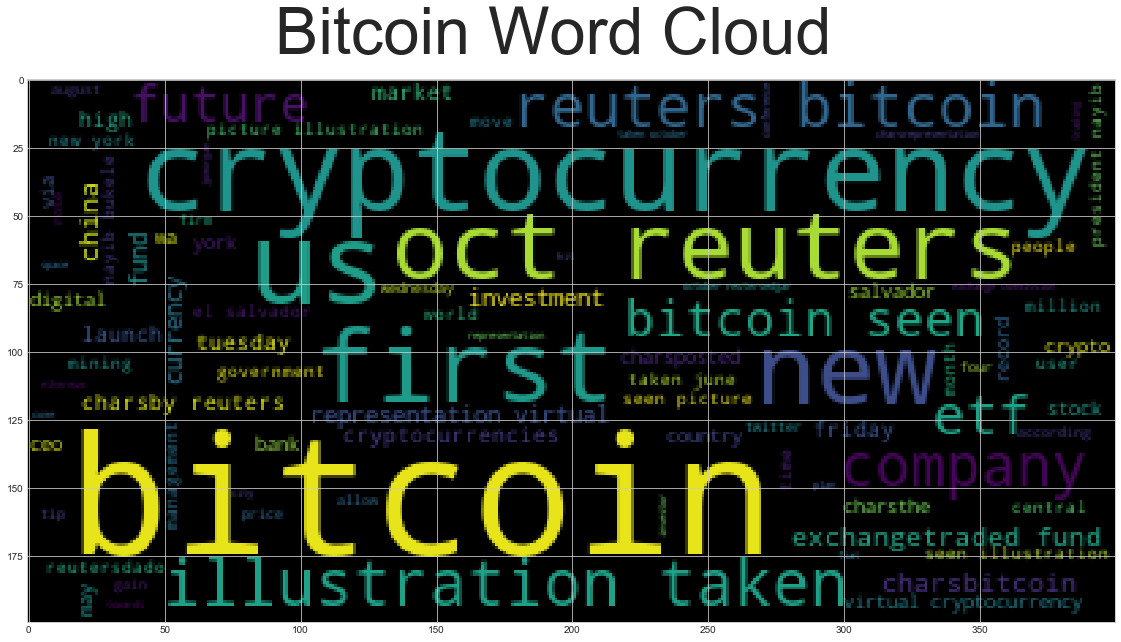

In [29]:
# concatenates bitcoin_df 'text' column Series  
bitcoin_article = bitcoin_df.text.str.cat()
# tokenize bitcoin_article using tokenizer function
bitcoin_tokens = tokenizer(bitcoin_article)
# join tokens as a big string
big_string_bit = ' '.join(bitcoin_tokens)

# Generate the Bitcoin word cloud and plot
wc_bit = WordCloud().generate(big_string_bit)
plt.imshow(wc_bit)
plt.suptitle('Bitcoin Word Cloud', fontsize = 65)

Text(0.5, 0.98, 'Ethereum Word Cloud')

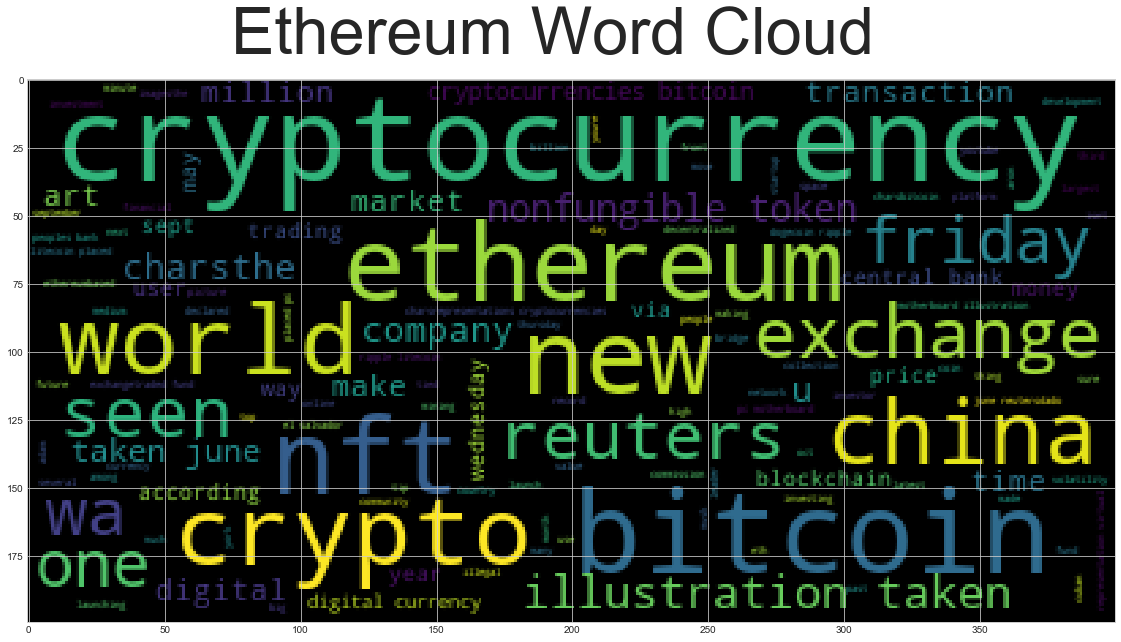

In [30]:
# concatenates ethereum_df 'text' column Series  
ethereum_article = ethereum_df.text.str.cat()
# tokenize ethereum_article using tokenizer function
ethereum_tokens = tokenizer(ethereum_article)
# join tokens as a big string
bit_string_eth = ' '.join(ethereum_tokens)

# Generate the Ethereum word cloud and plot 
wc_eth = WordCloud().generate(bit_string_eth)
plt.imshow(wc_eth)
plt.suptitle('Ethereum Word Cloud', fontsize = 65)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
# import warnings to ignore system generated warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# join the Bitcoin tokens text together
bitcoin_string = ' '.join(tokenizer(bitcoin_article))
doc = nlp(bitcoin_string)

In [36]:
# Add a title to the output and run the NER processor on all of the text
doc.user_data['title']='Bitcoin NER'
displacy.render(doc, style='ent')

In [37]:
# Render the visualization
# Note: It took long time to visualize displacy chart, so I am commenting out here. But 
# if someone wants to run on their local machine, Just delete the # mark below

#displacy.serve(doc, style="dep")

In [38]:
# List all Entities
# fetch all the token entities text
entities_bit = [ent.text for ent in doc.ents]
# fetch all the token entities labels
entities_label_bit = [labb.label_ for labb in doc.ents]
# using zip function, pair the  two list elements in form of key-value pairs.
entities_list_bit = dict(zip(entities_bit, entities_label_bit))
entities_list_bit

{'four month twitter': 'DATE',
 'first': 'ORDINAL',
 'mps': 'PERSON',
 'liliit': 'ORG',
 'four': 'CARDINAL',
 'jamie dimon': 'PERSON',
 'wednesday': 'DATE',
 'alex castro vergethe peoples': 'PERSON',
 'china': 'GPE',
 'friday': 'DATE',
 'wall street journal': 'ORG',
 'three': 'CARDINAL',
 'two decade': 'DATE',
 'august': 'DATE',
 'uk': 'GPE',
 'sec': 'ORG',
 'two': 'CARDINAL',
 'kristalina georgieva time': 'PERSON',
 'tuesday': 'DATE',
 'canada': 'GPE',
 'alberta': 'GPE',
 'june': 'DATE',
 'reutersdado ruvicillustrationhong kong': 'PERSON',
 'reuters': 'ORG',
 'october': 'DATE',
 'us securities exchange commission': 'ORG',
 'next month': 'DATE',
 'suhong kong': 'GPE',
 'gittens morestrnurphoto': 'ORG',
 'etfs': 'ORG',
 'daily': 'DATE',
 'caught minute': 'TIME',
 'mexican': 'NORP',
 'benito juarez': 'FAC',
 'midmay w representation virtual': 'ORG',
 'november': 'DATE',
 'jpmorgan chase': 'PERSON',
 'monday': 'DATE',
 'six month': 'DATE',
 'january': 'DATE',
 'cuban': 'NORP',
 'cnbc': 'O

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
ethereum_string = ' '.join(tokenizer(ethereum_article))
doc = nlp(ethereum_string)

In [40]:
# Add a title and run the NER processor on all of the text
doc.user_data['title']='Ethereum NER'
displacy.render(doc, style='ent')

In [41]:
# Render the visualization
# Note: It took long time to visualize displacy chart, so I am commenting out here. But 
# if someone wants to run on their local machine, Just delete the # mark below

#displacy.serve(doc, style="dep")

In [42]:
# List all Entities
# fetch all the token entities text
entities_eth = [ent.text for ent in doc.ents]
# fetch all the token entities labels
entities_label_eth = [labs.label_ for labs in doc.ents]
# using zip function, pair the  two list elements in form of key-value pairs.
entities_list_eth = dict(zip(entities_eth, entities_label_eth))
entities_list_eth

{'alex castro vergethe peoples': 'PERSON',
 'china': 'GPE',
 'friday': 'DATE',
 'cuban': 'NORP',
 'cnbc': 'ORG',
 'wednesday': 'DATE',
 'next month': 'DATE',
 'el salvador': 'GPE',
 'hong kong': 'GPE',
 'september': 'DATE',
 'ftx': 'CARDINAL',
 'june': 'DATE',
 'ruvicillustrationnew york': 'GPE',
 'oct': 'CARDINAL',
 'reuters': 'ORG',
 'november': 'DATE',
 'august': 'DATE',
 'central bank peoples bank': 'ORG',
 'buterin ethereumcrypto eth network': 'PERSON',
 'one year': 'DATE',
 'suillustrationnew york': 'GPE',
 'million': 'CARDINAL',
 'daily': 'DATE',
 'caught minute': 'TIME',
 'charscrypto': 'ORG',
 'thursday': 'DATE',
 'chinese': 'NORP',
 'five': 'CARDINAL',
 'billion third quarter': 'DATE',
 'previous quarter': 'DATE',
 'koseafp': 'PERSON',
 'north american': 'NORP',
 'wang': 'ORG',
 'charsbenyamin ahmed yearold': 'PERSON',
 'five million dollar': 'MONEY',
 'bitfinex': 'ORG',
 'dallas mavericks': 'PERSON',
 'us securities exchange commission': 'ORG',
 'four': 'CARDINAL',
 'october

---